import necessary library

In [1]:
#library use to import in the dataset
import csv
import numpy as np
import pandas as pd
#library use for preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#library use to analyse the dataset
import matplotlib.pyplot as plt
import seaborn as sns
#library use to analyse the score and correlation of model and attribute
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
#library use for take out model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

##Data input

In [3]:
train_data = pd.read_csv(r"C:\Users\MSI\Documents\Data Analysis\Assignment 3\Assignment3-WeatherData.csv")
unknow_test_data = pd.read_csv(r"C:\Users\MSI\Documents\Data Analysis\Assignment 3\Assignment3-UnknownData.csv")

In [4]:
train_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1
4,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0


In [5]:
unknow_test_data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No
1,Row1,Albury,19.7,27.2,0.0,NaN,NaN,WNW,46.0,NW,...,30.0,49.0,22.0,1004.8,1004.2,NaN,NaN,21.6,26.1,No
2,Row2,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,...,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No
3,Row3,Albury,14.9,27.3,0.0,NaN,NaN,SSE,41.0,SSE,...,13.0,50.0,30.0,1011.6,1008.5,NaN,1.0,17.4,25.8,No
4,Row4,Albury,13.2,31.9,0.0,NaN,NaN,NNW,35.0,S,...,9.0,53.0,25.0,1014.1,1011.6,NaN,NaN,18.0,29.8,No


##Explo dataset

In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51199 non-null  object 
 1   MinTemp        50959 non-null  float64
 2   MaxTemp        51085 non-null  float64
 3   Rainfall       50667 non-null  float64
 4   Evaporation    29227 non-null  float64
 5   Sunshine       26720 non-null  float64
 6   WindGustDir    47878 non-null  object 
 7   WindGustSpeed  47901 non-null  float64
 8   WindDir9am     47564 non-null  object 
 9   WindDir3pm     49795 non-null  object 
 10  WindSpeed9am   50695 non-null  float64
 11  WindSpeed3pm   50199 non-null  float64
 12  Humidity9am    50531 non-null  float64
 13  Humidity3pm    49840 non-null  float64
 14  Pressure9am    46138 non-null  float64
 15  Pressure3pm    46136 non-null  float64
 16  Cloud9am       31795 non-null  float64
 17  Cloud3pm       30551 non-null  float64
 18  Temp9a

In [9]:
train_data.isnull().sum()

Location             0
MinTemp            240
MaxTemp            114
Rainfall           532
Evaporation      21972
Sunshine         24479
WindGustDir       3321
WindGustSpeed     3298
WindDir9am        3635
WindDir3pm        1404
WindSpeed9am       504
WindSpeed3pm      1000
Humidity9am        668
Humidity3pm       1359
Pressure9am       5061
Pressure3pm       5063
Cloud9am         19404
Cloud3pm         20648
Temp9am            348
Temp3pm           1038
RainToday          532
RainTomorrow         0
dtype: int64

In [10]:
train_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,50959.00,51085.00,50667.00,29227.00,26720.00,47901.00,50695.00,50199.00,50531.00,49840.00,46138.00,46136.00,31795.00,30551.00,50851.00,50161.00,51199.00
mean,12.19,23.23,2.32,5.45,7.63,39.99,14.00,18.63,68.84,51.49,1017.65,1015.25,4.44,4.51,16.99,21.69,0.22
std,6.42,7.15,8.14,4.08,3.78,13.53,8.88,8.77,19.02,20.83,7.13,7.07,2.88,2.72,6.51,6.97,0.42
min,-8.50,-4.10,0.00,0.00,0.00,6.00,0.00,0.00,1.00,0.00,980.50,979.00,0.00,0.00,-6.20,-4.40,0.00
25%,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.25,16.60,0.00
50%,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00
75%,16.90,28.30,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.50,0.00
max,33.90,47.30,268.60,72.20,14.50,130.00,130.00,83.00,100.00,100.00,1040.60,1037.90,9.00,8.00,39.00,46.70,1.00


In [11]:
train_data.shape

(51199, 22)

In [12]:
unknow_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         9965 non-null   object 
 1   Location       9965 non-null   object 
 2   MinTemp        9924 non-null   float64
 3   MaxTemp        9944 non-null   float64
 4   Rainfall       9882 non-null   float64
 5   Evaporation    5756 non-null   float64
 6   Sunshine       5296 non-null   float64
 7   WindGustDir    9267 non-null   object 
 8   WindGustSpeed  9272 non-null   float64
 9   WindDir9am     9294 non-null   object 
 10  WindDir3pm     9700 non-null   object 
 11  WindSpeed9am   9880 non-null   float64
 12  WindSpeed3pm   9776 non-null   float64
 13  Humidity9am    9868 non-null   float64
 14  Humidity3pm    9718 non-null   float64
 15  Pressure9am    9014 non-null   float64
 16  Pressure3pm    9003 non-null   float64
 17  Cloud9am       6251 non-null   float64
 18  Cloud3pm

In [13]:
unknow_test_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,9924.00,9944.00,9882.00,5756.00,5296.00,9272.00,9880.00,9776.00,9868.00,9718.00,9014.00,9003.00,6251.00,6025.00,9912.00,9769.00
mean,12.20,23.25,2.44,5.43,7.62,39.95,14.10,18.74,68.95,51.60,1017.67,1015.27,4.44,4.49,17.00,21.68
std,6.38,7.07,9.28,4.25,3.79,13.76,8.99,8.95,18.90,20.67,7.07,7.01,2.90,2.72,6.47,6.87
min,-7.20,-2.10,0.00,0.00,0.00,7.00,0.00,0.00,1.00,1.00,989.60,981.90,0.00,0.00,-5.30,-3.50
25%,7.70,18.00,0.00,2.60,4.90,30.00,7.00,13.00,57.00,37.00,1013.00,1010.50,1.00,2.00,12.20,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.80,1015.30,5.00,5.00,16.70,21.10
75%,16.80,28.20,0.60,7.20,10.70,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.30
max,31.90,48.10,278.40,82.40,14.20,120.00,74.00,67.00,100.00,100.00,1040.20,1037.10,8.00,8.00,36.20,46.10


In [15]:
unknow_test_data.isnull().sum()

row ID              0
Location            0
MinTemp            41
MaxTemp            21
Rainfall           83
Evaporation      4209
Sunshine         4669
WindGustDir       698
WindGustSpeed     693
WindDir9am        671
WindDir3pm        265
WindSpeed9am       85
WindSpeed3pm      189
Humidity9am        97
Humidity3pm       247
Pressure9am       951
Pressure3pm       962
Cloud9am         3714
Cloud3pm         3940
Temp9am            53
Temp3pm           196
RainToday          83
dtype: int64

In [20]:
unknow_test_data.shape

(9965, 22)

##Preprocessing Data

Check duplicate data

In [31]:
#Check duplicates
print('Duplicates in train data: ', train_data.duplicated().sum())
print('Duplicates in test data: ', unknow_test_data.duplicated().sum())

Duplicates in train data:  12
Duplicates in test data:  0


In [33]:
#Drop duplicates
train_data.drop_duplicates(inplace=True)

In [35]:
#Check duplicates
print('Duplicates in train data: ', train_data.duplicated().sum())
print('Duplicates in test data: ', unknow_test_data.duplicated().sum())

Duplicates in train data:  0
Duplicates in test data:  0


###Train data set

Fill the N/a data depend on there type

In [39]:
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=(['object'])).columns

Using fit_transfrom so it can update the mean along the way given less bias data

In [42]:
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputer to training data
train_data[numerical_cols] = imputer_num.fit_transform(train_data[numerical_cols])
train_data[categorical_cols] = imputer_cat.fit_transform(train_data[categorical_cols])


In [44]:
train_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Change all the categorical column into number so we can process the data

In [47]:
# Encode categorical variables with LabelEncoder
label_encoder = LabelEncoder()

In [49]:
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [51]:
train_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,12.90,25.70,0.00,5.45,7.63,15,46.00,13,15,...,38.00,30.00,1007.60,1008.70,4.44,2.00,21.00,23.20,0,0.00
1,2,9.20,28.00,0.00,5.45,7.63,4,24.00,9,0,...,45.00,16.00,1017.60,1012.80,4.44,4.51,18.10,26.50,0,0.00
2,2,17.50,32.30,1.00,5.45,7.63,13,41.00,1,7,...,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,0,0.00
3,2,9.70,31.90,0.00,5.45,7.63,6,80.00,9,7,...,42.00,9.00,1008.90,1003.60,4.44,4.51,18.30,30.20,0,1.00
4,2,13.10,30.10,1.40,5.45,7.63,13,28.00,8,10,...,58.00,27.00,1007.00,1005.70,4.44,4.51,20.10,28.20,1,0.00


Look at the outliner

C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\3190662557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=outliers_train, x=feature, palette='Blues')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\3190662557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=outliers_train, x=feature, palette='Blues')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\3190662557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=outliers_train, x=feature, palette='Blues')
C:\User

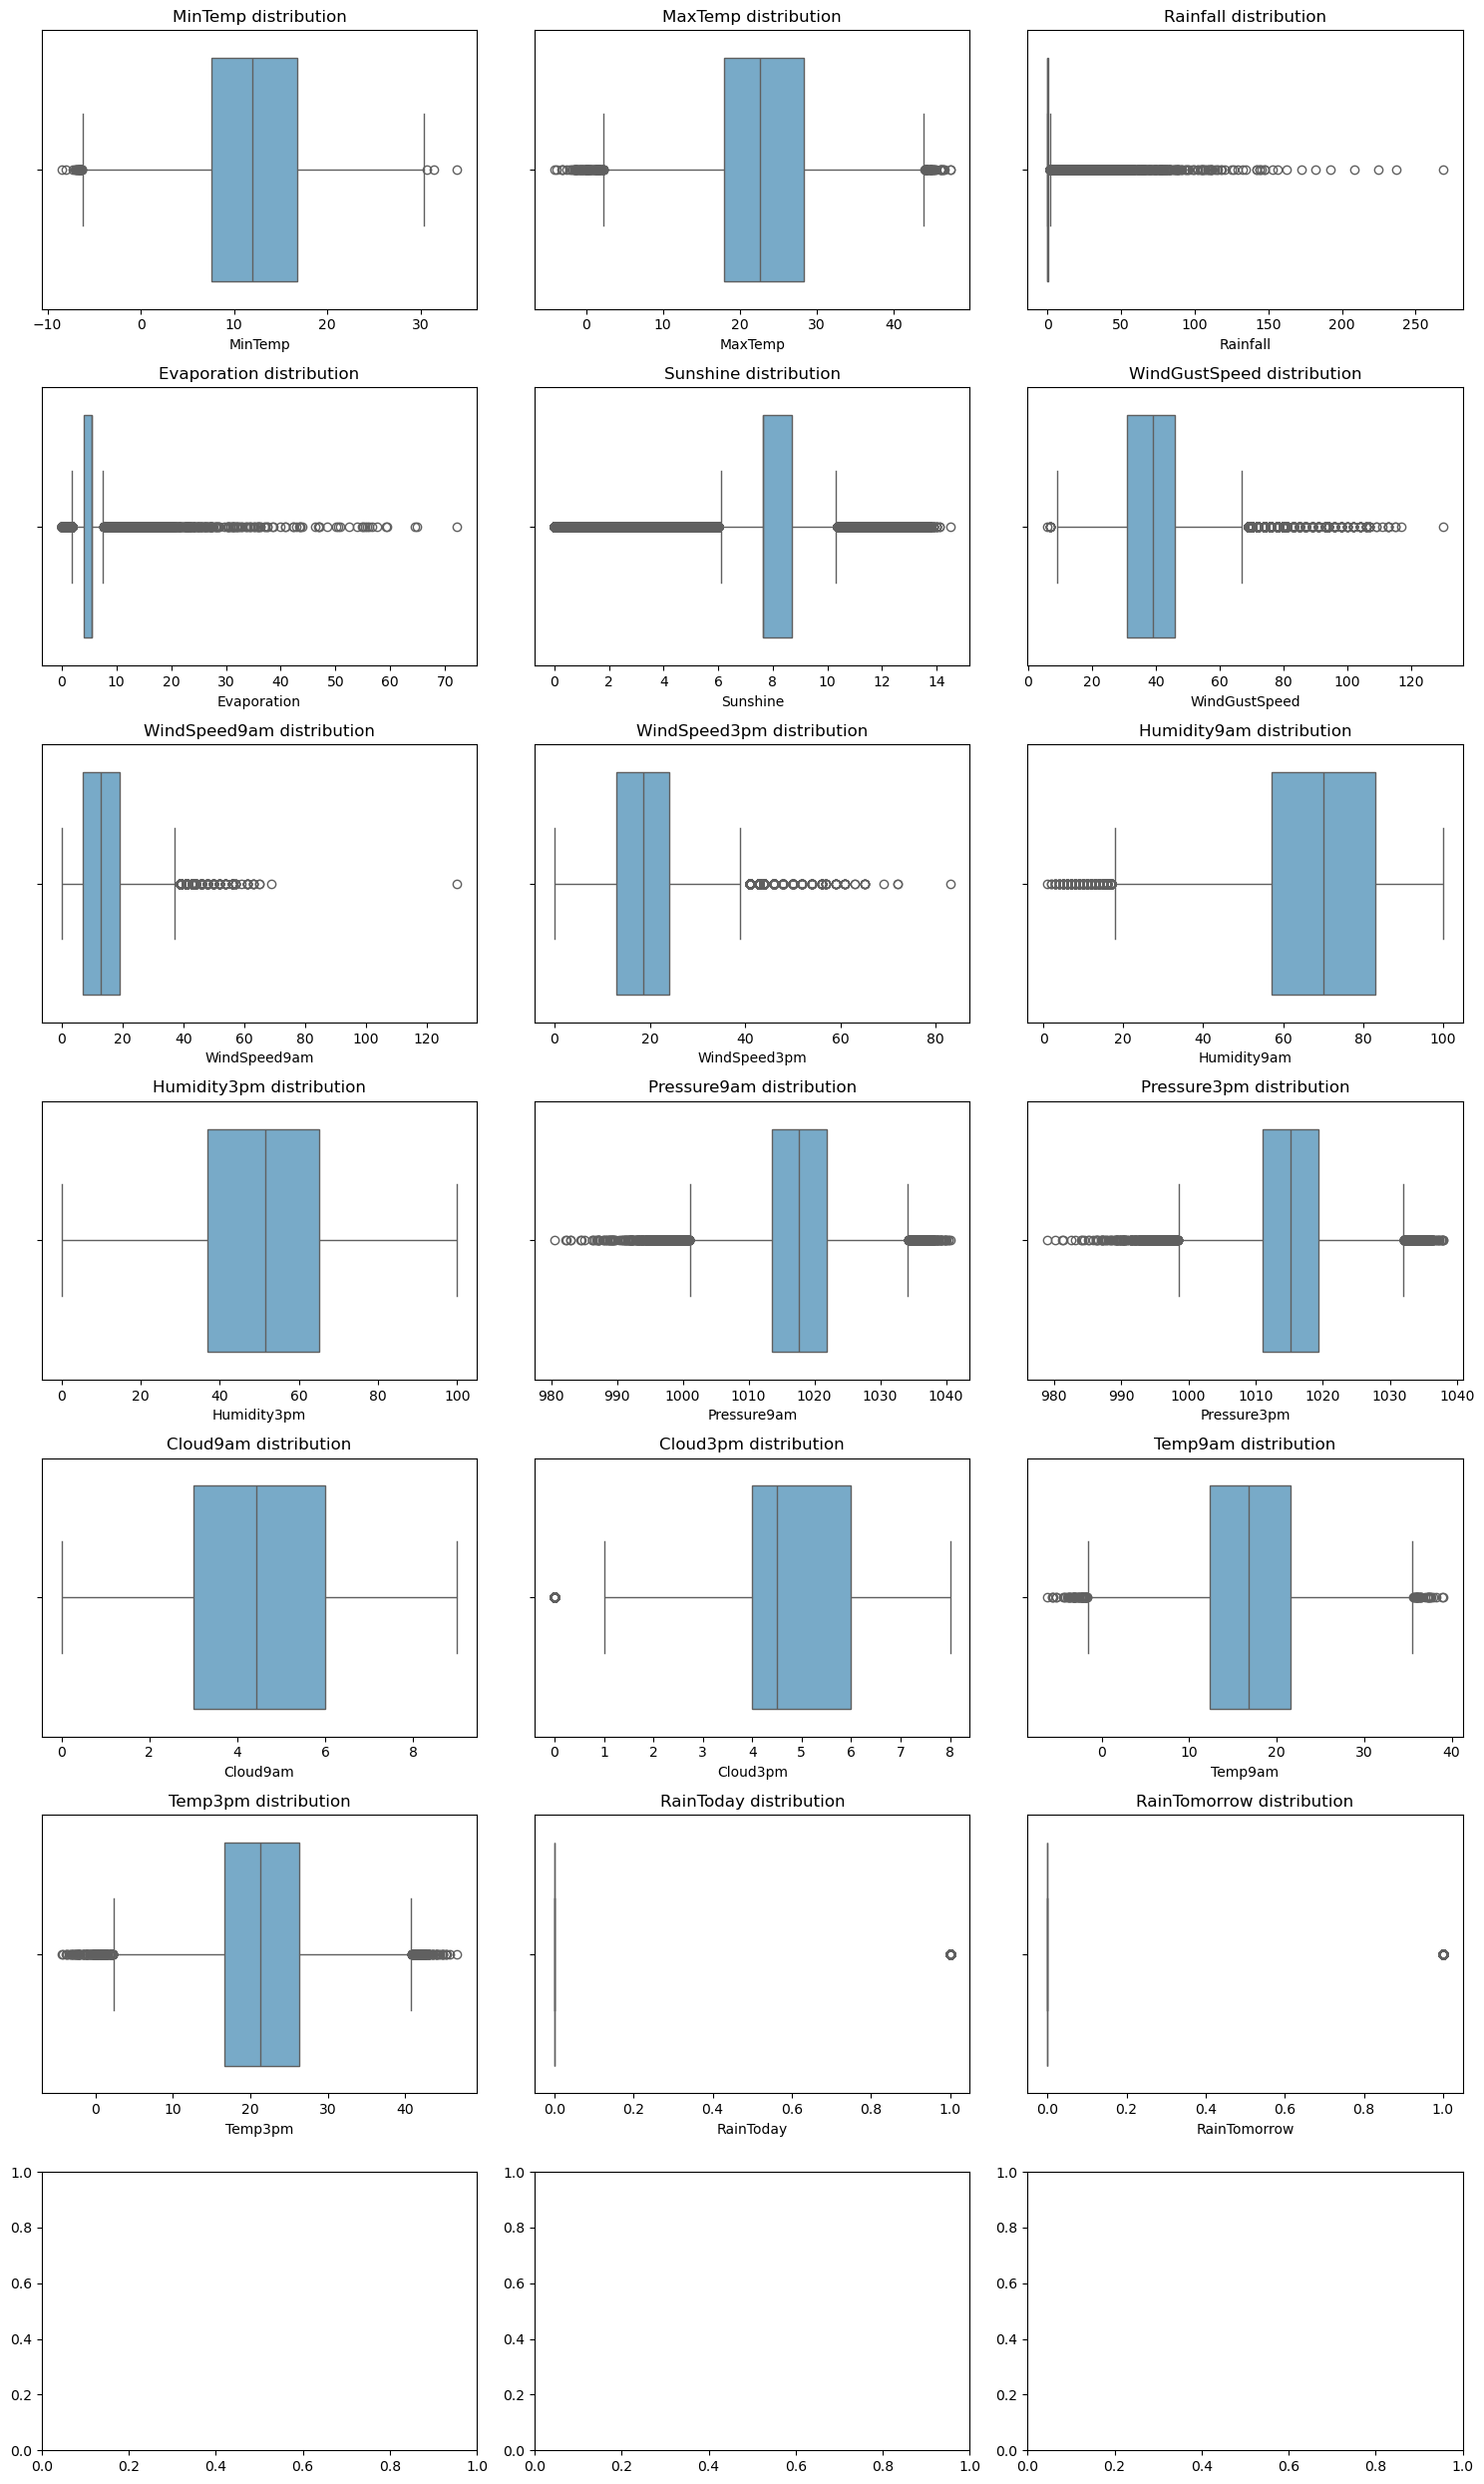

In [54]:
columns_to_drop = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
outliers_train = train_data.drop(columns=columns_to_drop)
num_rows = 7
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,25))
features = outliers_train.columns
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(ax=axes[row, col], data=outliers_train, x=feature, palette='Blues')
    axes[row, col].set_title(f"{feature} distribution")

# Adjust the layout
plt.tight_layout()
plt.show()

###Test data set

In [56]:
unknow_test_data = unknow_test_data.drop(columns='row ID')

In [57]:
test_numerical_cols = unknow_test_data.select_dtypes(include=['float64', 'int64']).columns
test_categorical_cols = unknow_test_data.select_dtypes(include=(['object'])).columns

In [58]:
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputer to test data
unknow_test_data[test_numerical_cols] = imputer_num.fit_transform(unknow_test_data[test_numerical_cols])
unknow_test_data[test_categorical_cols] = imputer_cat.fit_transform(unknow_test_data[test_categorical_cols])


In [59]:
unknow_test_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [60]:
# Encode categorical variables with LabelEncoder
for col in categorical_cols:
    unknow_test_data[col] = label_encoder.fit_transform(unknow_test_data[col])

In [61]:
unknow_test_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,14.60,29.70,0.20,5.43,7.62,14,56.00,13,13,...,24.00,55.00,23.00,1009.20,1005.40,4.44,4.49,20.60,28.90,0
1,2,19.70,27.20,0.00,5.43,7.62,14,46.00,7,15,...,30.00,49.00,22.00,1004.80,1004.20,4.44,4.49,21.60,26.10,0
2,2,21.70,36.90,0.00,5.43,7.62,13,39.95,3,9,...,11.00,53.00,26.00,1008.80,1004.70,4.44,4.49,25.50,35.20,0
3,2,14.90,27.30,0.00,5.43,7.62,10,41.00,10,9,...,13.00,50.00,30.00,1011.60,1008.50,4.44,1.00,17.40,25.80,0
4,2,13.20,31.90,0.00,5.43,7.62,6,35.00,8,1,...,9.00,53.00,25.00,1014.10,1011.60,4.44,4.49,18.00,29.80,0


C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\4217060384.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=test_outliers_train, x=feature, palette='Blues')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\4217060384.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=test_outliers_train, x=feature, palette='Blues')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15816\4217060384.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=test_outliers_train, x=feature, palette='

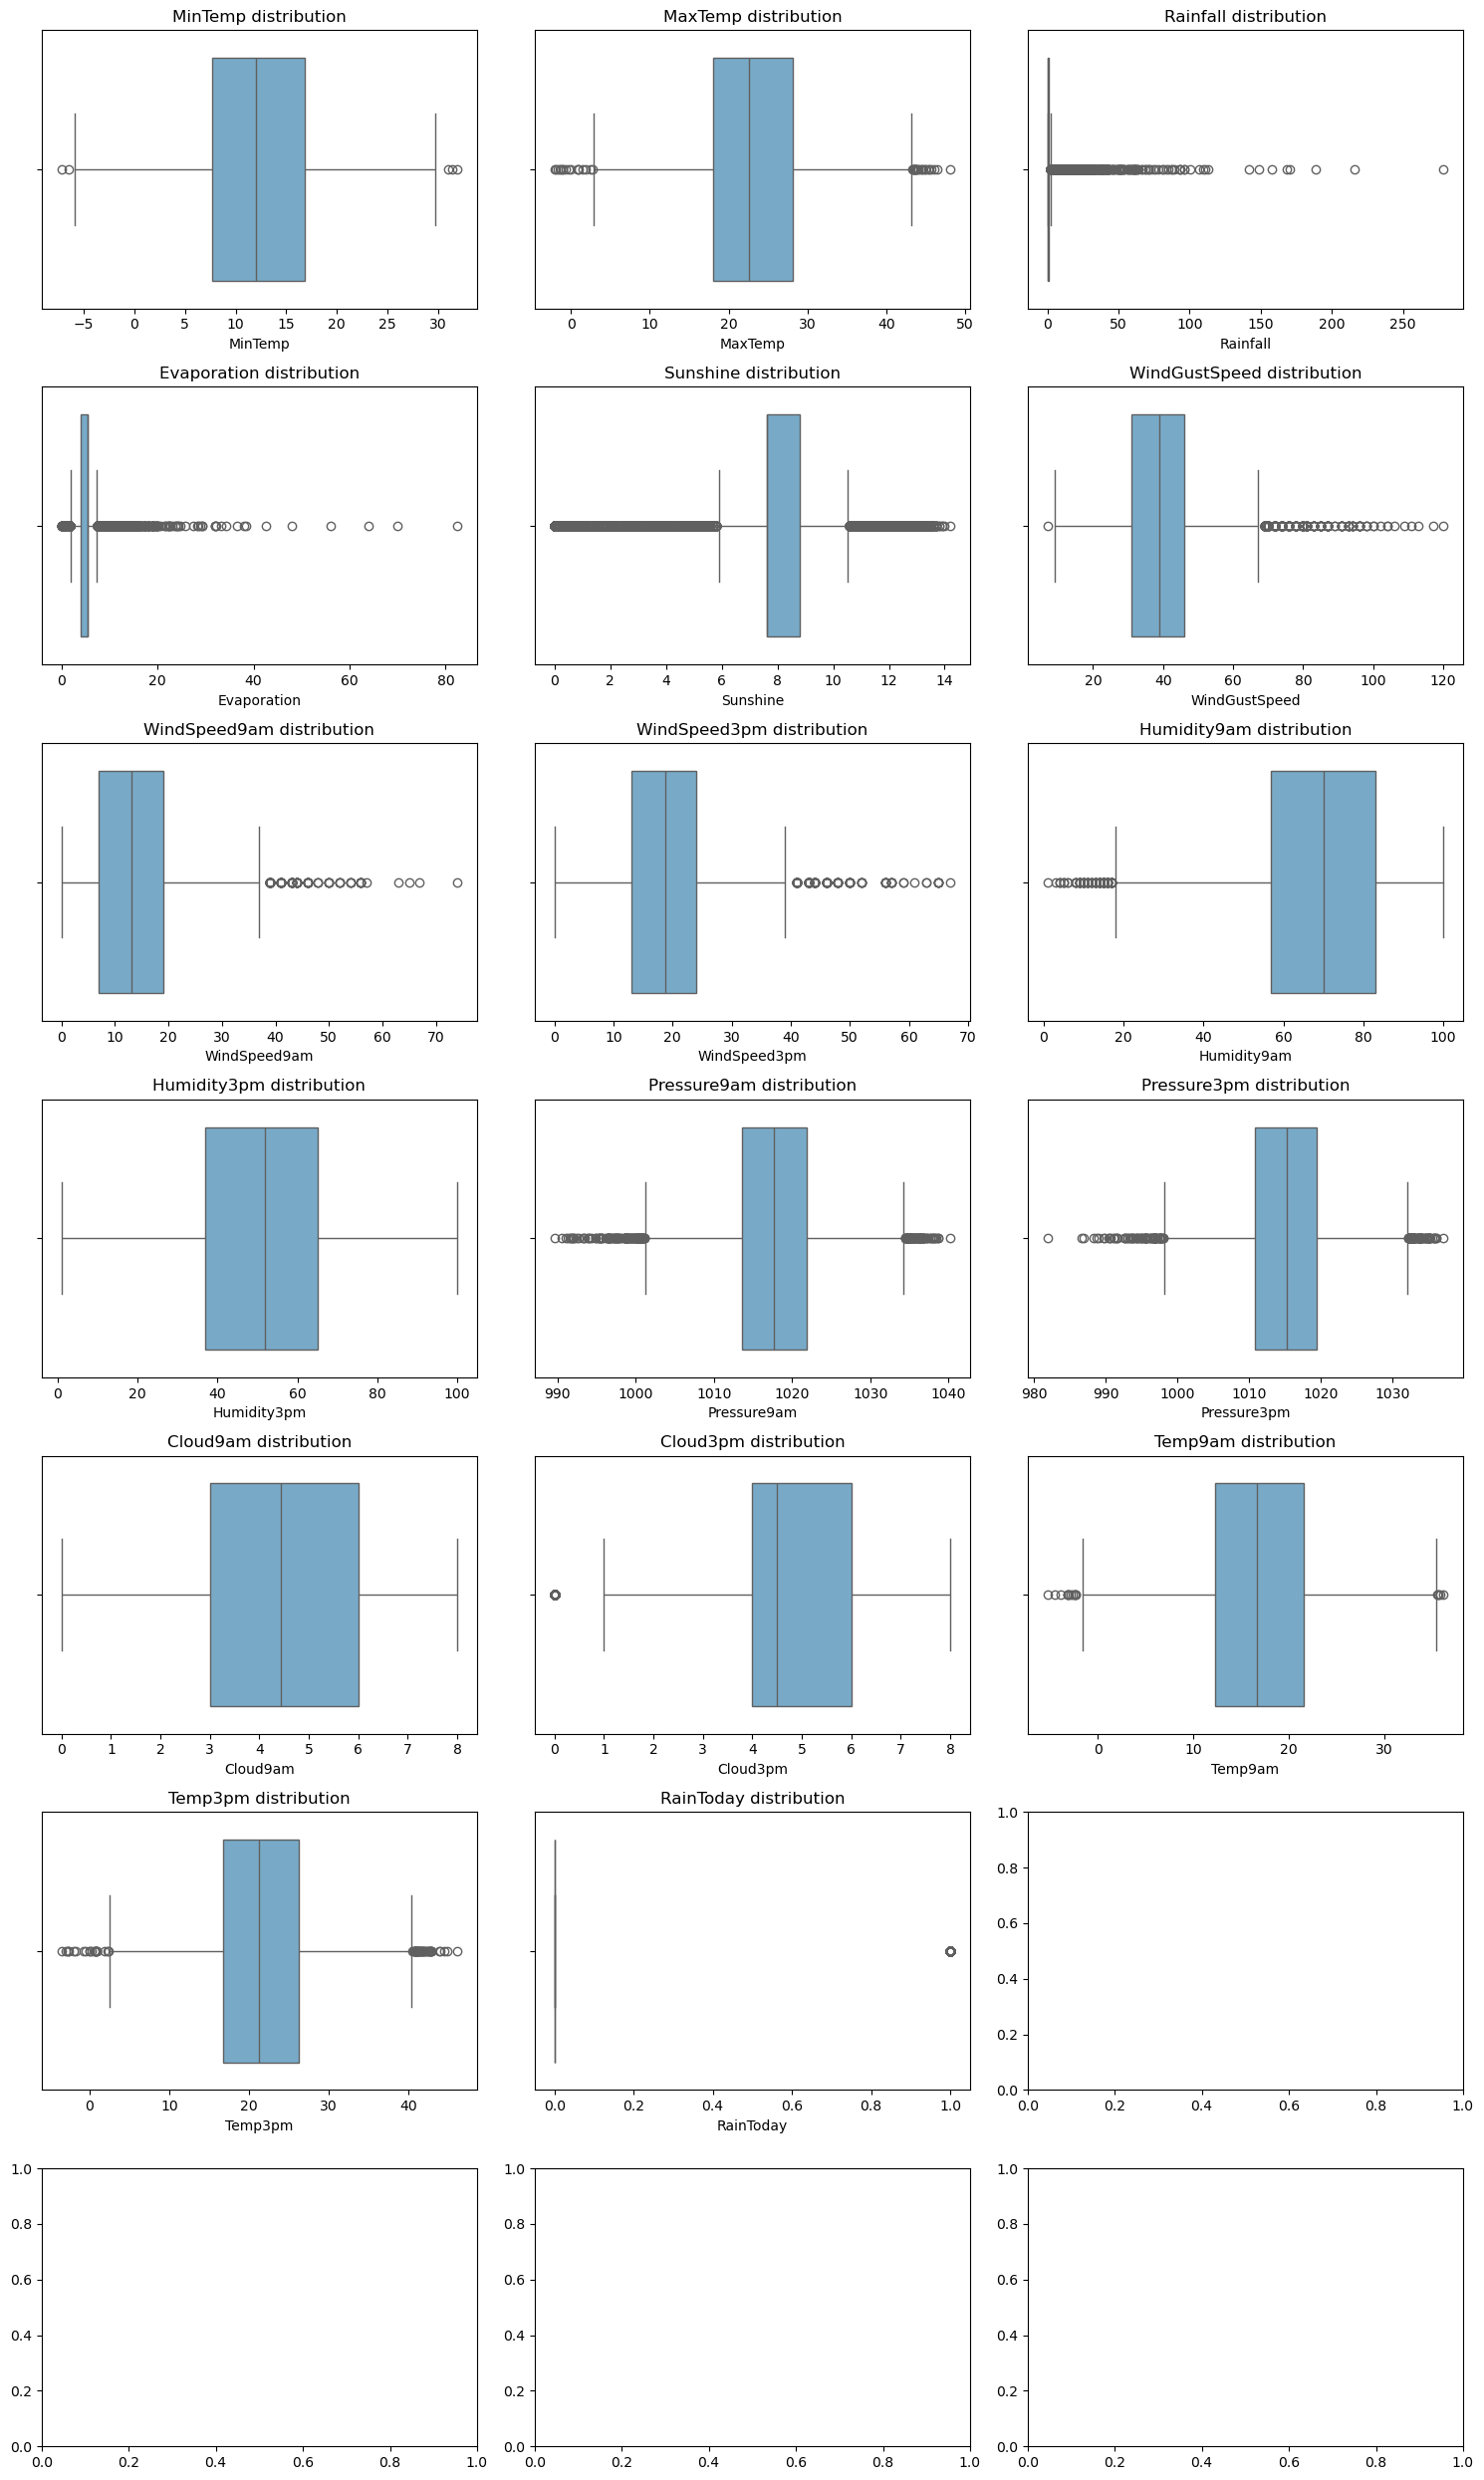

In [62]:
test_outliers_train = unknow_test_data.drop(columns=columns_to_drop)
num_rows = 7
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,25))
test_features = test_outliers_train.columns
for i, feature in enumerate(test_features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(ax=axes[row, col], data=test_outliers_train, x=feature, palette='Blues')
    axes[row, col].set_title(f"{feature} distribution")

# Adjust the layout
plt.tight_layout()
plt.show()

##Feature Engineer

In [71]:
# Set the number of top features to select
k = 12

# Define the score function (you can use mutual_info_classif or f_classif)
score_func = mutual_info_classif  # mutual_info_classif or f_classif

# Separate features and target variable
X = train_data.drop(columns=['RainTomorrow'])
y = train_data['RainTomorrow']

# Create the SelectKBest selector
selector = SelectKBest(score_func=score_func, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the scores of all features
scores = selector.scores_

# Create a DataFrame to hold feature names, scores, and ranking
feature_names = X.columns
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Score': scores
})

# Add a rank column based on scores (1 is the best)
feature_ranking['Rank'] = feature_ranking['Score'].rank(ascending=False)

# Sort by rank
feature_ranking = feature_ranking.sort_values(by='Rank')

# Get the top k features and their scores
top_features = feature_ranking.head(k)

# Display the results
print("Top features based on their scores:\n", top_features)

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Display the selected feature names
print("\nSelected feature names:")
for name in selected_feature_names:
    print(name)


Top features based on their scores:
           Feature  Score  Rank
13    Humidity3pm   0.11  1.00
3        Rainfall   0.06  2.00
5        Sunshine   0.06  3.00
17       Cloud3pm   0.06  4.00
20      RainToday   0.04  5.00
16       Cloud9am   0.03  6.00
12    Humidity9am   0.03  7.00
14    Pressure9am   0.03  8.00
7   WindGustSpeed   0.03  9.00
15    Pressure3pm   0.02 10.00
19        Temp3pm   0.02 11.00
0        Location   0.01 12.00

Selected feature names:
Location
Rainfall
Sunshine
WindGustSpeed
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp3pm
RainToday


##Correlation Matrix

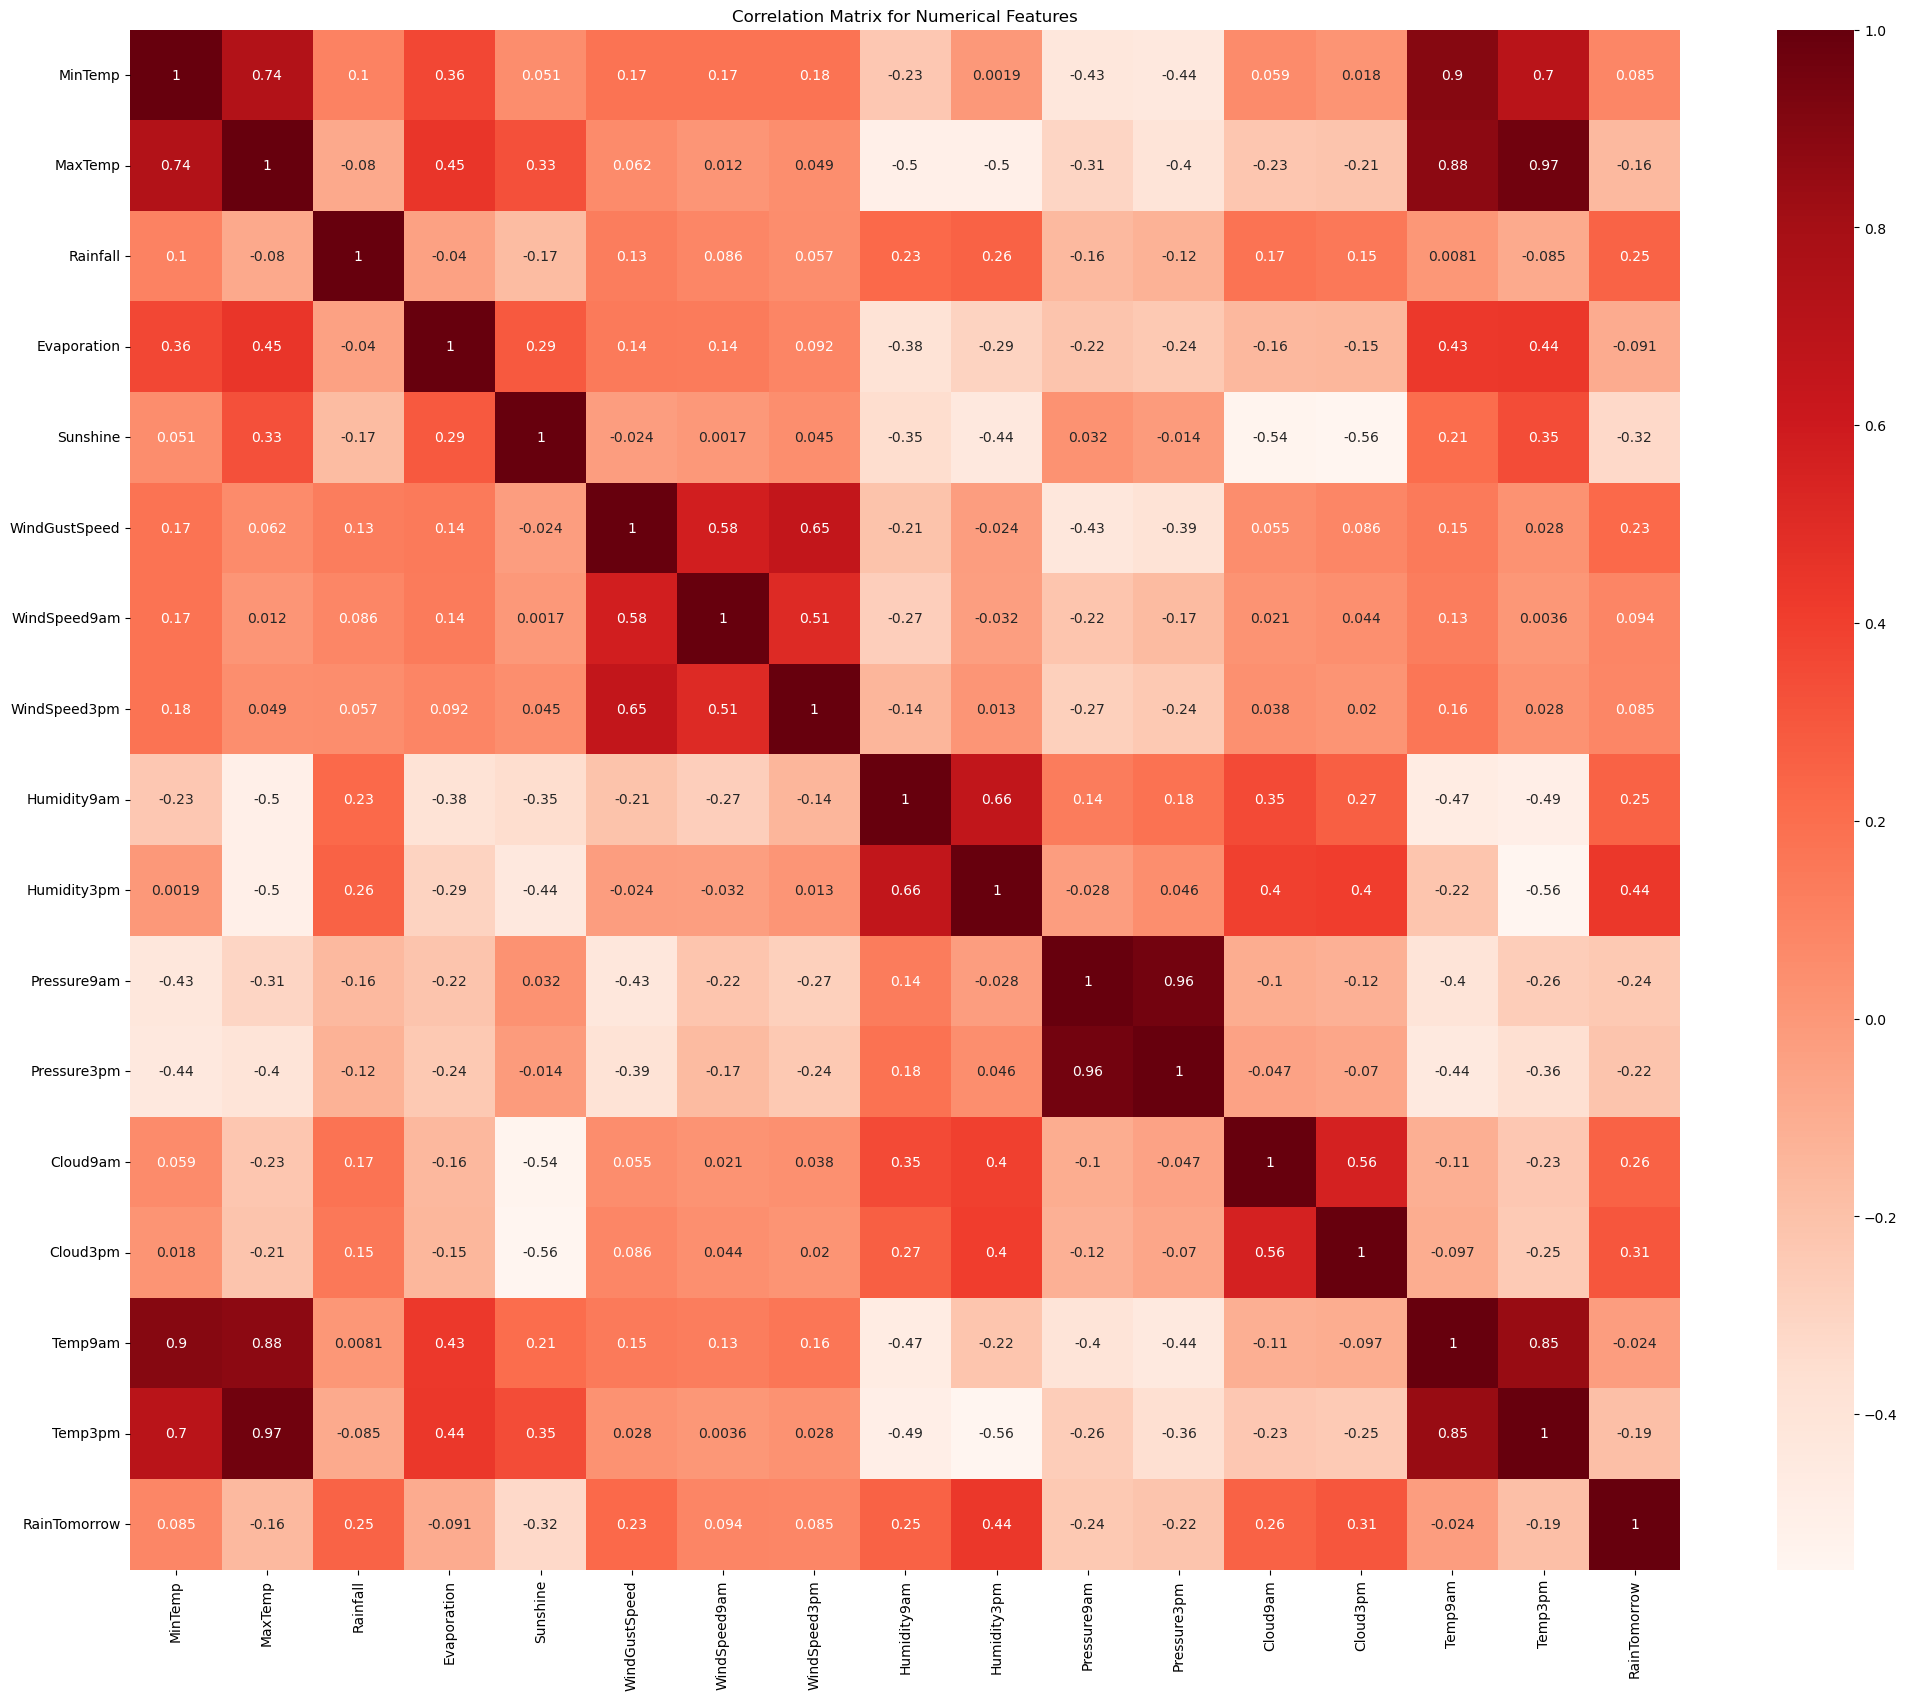

In [73]:
# Ensure train_data contains only numerical columns for correlation
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns only
correlation_matrix = train_data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

##Data Prepare

In [76]:
X = train_data[selected_feature_names]  # Features selected by SelectKBest
y = train_data['RainTomorrow']  # Target variable

In [77]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [79]:
X_unknown_scaled = scaler.transform(unknow_test_data[selected_feature_names])

In [80]:
##Apply SMOTE to balance the dataset only ONCE ###
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### Now re-use the resampled data for all models ###

##Plotting ROC curve function

In [82]:
### Utility function for plotting ROC curve ###
def plot_roc_curve(model_name, y_val, y_val_probs):
    fpr, tpr, _ = roc_curve(y_val, y_val_probs)
    auc_score = roc_auc_score(y_val, y_val_probs)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    return auc_score

# Initialize plot for ROC curves
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

##Utility function to display confusion matrix

In [91]:
def display_confusion_matrix(y_val, y_val_preds, model_name):
    cm = confusion_matrix(y_val, y_val_preds)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

##Random Forest

In [95]:
params_grid = {
    'n_estimators': [50, 100],         # Number of trees in the forest
    'max_depth': [2, 4],                    # Maximum depth of each tree
    'min_samples_split': [5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],             # Minimum samples required at a leaf node
    'bootstrap': [False]                    # Whether to bootstrap samples when building trees
}


In [97]:
# Initialize the RandomForestClassifier
random = RandomForestClassifier(class_weight='balanced', random_state=42)

In [99]:
# Set up GridSearchCV with 5-fold cross-validation
grid_search_random = GridSearchCV(random, params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_random.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search_random.best_params_)
print("Best score (accuracy):", grid_search_random.best_score_)

Best hyperparameters: {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score (accuracy): 0.768321440164156


In [100]:
# Make predictions on the test set
y_val_preds_random = grid_search_random.predict(X_val_scaled)
y_val_probs_random = grid_search_random.predict_proba(X_val_scaled)[:, 1]


Random Forest Performance:
F1 score:  0.5947053800170794
Precision score:  0.49320113314447594
Recall score:  0.7488172043010752
Accuracy:  0.7682164485251025
AUC score (Random Forest): 0.84


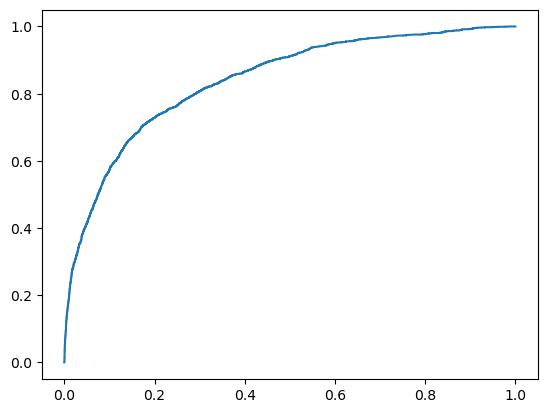

In [101]:
# Evaluate the model on the test set
f1 = f1_score(y_val, y_val_preds_random)
precision = precision_score(y_val, y_val_preds_random)
recall = recall_score(y_val, y_val_preds_random)
accuracy = accuracy_score(y_val, y_val_preds_random)


# Plot ROC and calculate AUC for Random Forest
auc_rf = plot_roc_curve("Random Forest", y_val, y_val_probs_random)

# Print evaluation metrics for the test set
print("\nRandom Forest Performance:")
print("F1 score: ", f1)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("Accuracy: ", accuracy)
print(f"AUC score (Random Forest): {auc_rf:.2f}")


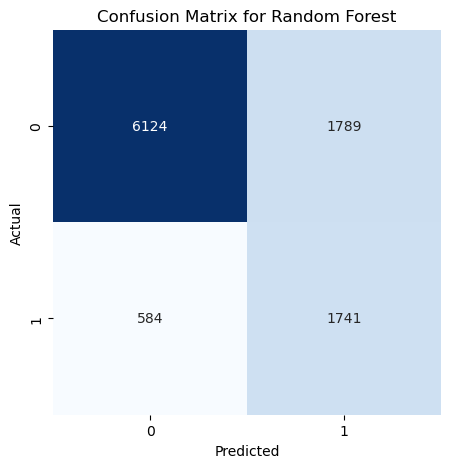

In [102]:
display_confusion_matrix(y_val, y_val_preds_random, "Random Forest")

Best hyperparameters (SMOTE): {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score (accuracy, SMOTE): 0.7860334934697883

Random Forest Performance on SMOTE Data:
F1 (SMOTE): 0.60
Precision (SMOTE): 0.50
Recall (SMOTE): 0.74
Accuracy (SMOTE): 0.77
AUC score (SMOTE): 0.84


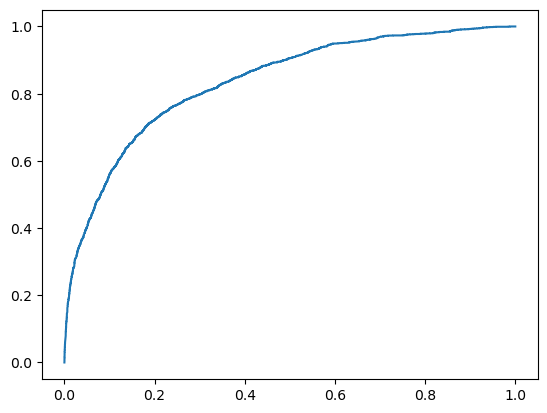

In [103]:
# Initialize and train Random Forest with class_weight balanced and more trees wwith SMOTE data
random_forest_smote = RandomForestClassifier(class_weight='balanced', random_state=42)

# GridSearchCV on SMOTE data
grid_search_random_smote = GridSearchCV(random_forest_smote, params_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_random_smote.fit(X_train_resampled, y_train_resampled)

# Get best hyperparameters and score for SMOTE data
print("Best hyperparameters (SMOTE):", grid_search_random_smote.best_params_)
print("Best score (accuracy, SMOTE):", grid_search_random_smote.best_score_)

# Predict and evaluate on validation set (SMOTE data)
y_val_preds_smote = grid_search_random_smote.predict(X_val_scaled)
y_val_probs_smote = grid_search_random_smote.predict_proba(X_val_scaled)[:, 1]

# Plot ROC and calculate AUC for Random Forest with SMOTE
auc_rf_smote = plot_roc_curve("Random Forest (SMOTE)", y_val, y_val_probs_smote)

print("\nRandom Forest Performance on SMOTE Data:")
print(f"F1 (SMOTE): {f1_score(y_val, y_val_preds_smote):.2f}")
print(f"Precision (SMOTE): {precision_score(y_val, y_val_preds_smote):.2f}")
print(f"Recall (SMOTE): {recall_score(y_val, y_val_preds_smote):.2f}")
print(f"Accuracy (SMOTE): {accuracy_score(y_val, y_val_preds_smote):.2f}")
print(f"AUC score (SMOTE): {auc_rf_smote:.2f}")

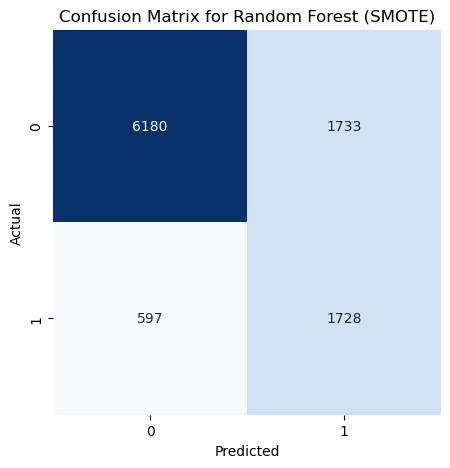

In [104]:
display_confusion_matrix(y_val, y_val_preds_smote, "Random Forest (SMOTE)")

In [105]:
#y_unknown_preds = grid_search_random.predict(X_unknown_scaled)

In [106]:
# y_unknown_preds = grid_search_random.predict(X_unknown_scaled)

In [107]:
# unknown_test_data_with_predictions = pd.DataFrame({
#     'row ID': [f"Row{i}" for i in range(len(unknow_test_data))],
#     'Predict-RainTomorrow': y_unknown_preds  # Predictions
# })

# #Save the result in the required format as a new CSV file
# output_file_path = '/content/drive/MyDrive/Colab Notebooks/Assignment3-UnknownData_with_Predictions.csv'
# unknown_test_data_with_predictions.to_csv(output_file_path, index=False)

# # Print the first few rows to confirm format
# print(unknown_test_data_with_predictions.head())

##Decision Tree

In [109]:
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']  # Limiting the number of features used
}

In [110]:
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_grid = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Decision Tree accuracy:", dt_grid.best_score_)

Best Decision Tree parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 10}
Best Decision Tree accuracy: 0.5953298325512961


In [111]:
y_val_preds_dt = dt_grid.predict(X_val_scaled)
y_val_probs_dt = dt_grid.predict_proba(X_val_scaled)[:, 1]


Decision Tree Performance:
F1 score:  0.6014442916093535
Precision score:  0.5010025780578631
Recall score:  0.752258064516129
Accuracy:  0.7735885915217816
AUC score (Decision Tree): 0.84


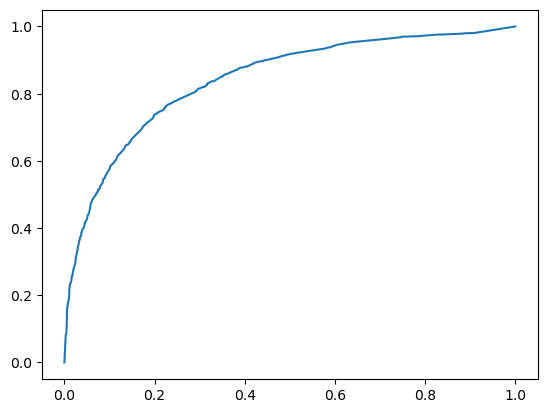

In [112]:
# ROC and AUC
auc_dt = plot_roc_curve("Decision Tree", y_val, y_val_probs_dt)

# Evaluate the model on the test set
f1 = f1_score(y_val, y_val_preds_dt)
precision = precision_score(y_val, y_val_preds_dt)
recall = recall_score(y_val, y_val_preds_dt)
accuracy = accuracy_score(y_val, y_val_preds_dt)

print("\nDecision Tree Performance:")
print("F1 score: ", f1)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("Accuracy: ", accuracy)
print(f"AUC score (Decision Tree): {auc_dt:.2f}")

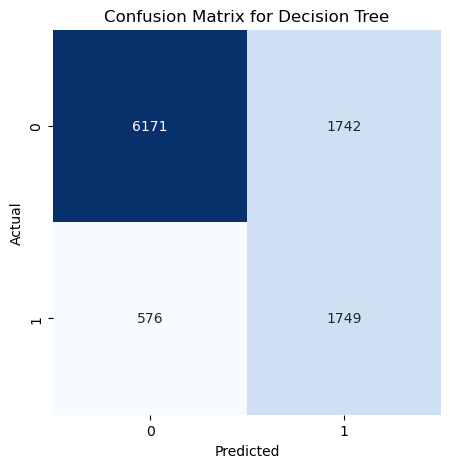

In [113]:
display_confusion_matrix(y_val, y_val_preds_dt, "Decision Tree")


Decision Tree Performance on SMOTE Data:
F1 score:  0.5938591652877367
Precision score:  0.5186255619781631
Recall score:  0.6946236559139785
Accuracy:  0.7842352021879273


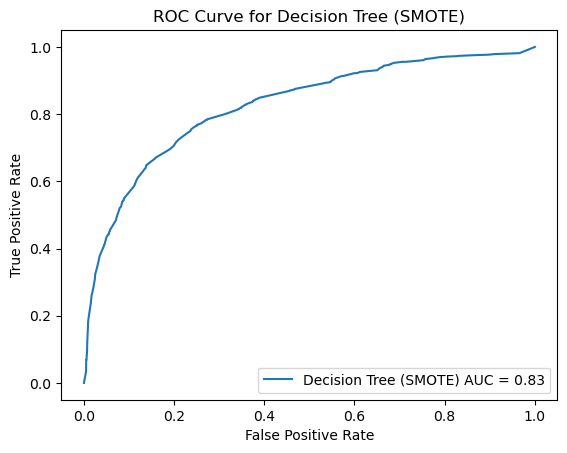

AUC score (Decision Tree SMOTE): 0.83


In [121]:
# Train with SMOTE data
dt_grid_smote = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_smote.fit(X_train_resampled, y_train_resampled)

# Get probability predictions for ROC and AUC
y_val_probs_dt_smote = dt_grid_smote.predict_proba(X_val_scaled)[:, 1]

# Convert probabilities to binary predictions (threshold 0.5)
y_val_preds_dt_smote = (y_val_probs_dt_smote >= 0.5).astype(int)

# Evaluate the model on the test set
f1_smote = f1_score(y_val, y_val_preds_dt_smote)
precision_smote = precision_score(y_val, y_val_preds_dt_smote)
recall_smote = recall_score(y_val, y_val_preds_dt_smote)
accuracy_smote = accuracy_score(y_val, y_val_preds_dt_smote)

print("\nDecision Tree Performance on SMOTE Data:")
print("F1 score: ", f1_smote)
print("Precision score: ", precision_smote)
print("Recall score: ", recall_smote)
print("Accuracy: ", accuracy_smote)

# ROC and AUC for Decision Tree with SMOTE
auc_dt_smote = roc_auc_score(y_val, y_val_probs_dt_smote)

# Plot ROC Curve (if you have a function like plot_roc_curve, otherwise use this):
fpr, tpr, _ = roc_curve(y_val, y_val_probs_dt_smote)
plt.plot(fpr, tpr, label=f"Decision Tree (SMOTE) AUC = {auc_dt_smote:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (SMOTE)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC score (Decision Tree SMOTE): {auc_dt_smote:.2f}")


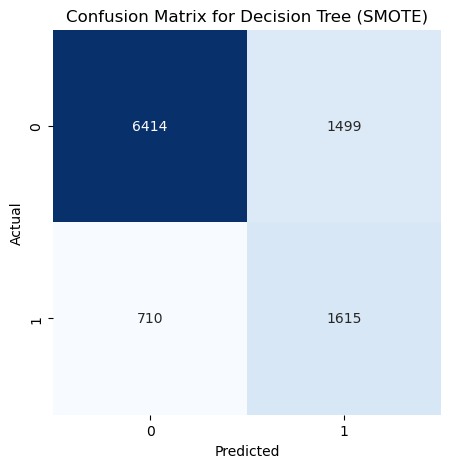

In [123]:
display_confusion_matrix(y_val, y_val_preds_dt_smote, "Decision Tree (SMOTE)")

##K-Nearest Neighbors (KNN)

In [106]:
knn_param_grid = {
    'n_neighbors': [5, 7, 9, 11, 15, 20],  # Larger n_neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [107]:
knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN accuracy:", knn_grid.best_score_)

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best KNN accuracy: 0.8442697260135287


In [108]:
y_val_preds_knn = knn_grid.predict(X_val_scaled)
y_val_probs_knn = knn_grid.predict_proba(X_val_scaled)[:, 1]


KNN Performance:
F1 score:  0.5594923320994183
Precision score:  0.726149622512011
Recall score:  0.45505376344086024
Accuracy:  0.8372729048642313
AUC score (KNN): 0.85


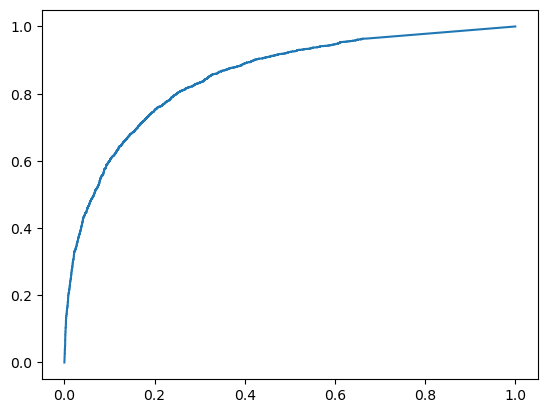

In [109]:
# ROC and AUC
auc_knn = plot_roc_curve("KNN", y_val, y_val_probs_knn)

# Evaluate the model on the test set
f1 = f1_score(y_val, y_val_preds_knn)
precision = precision_score(y_val, y_val_preds_knn)
recall = recall_score(y_val, y_val_preds_knn)
accuracy = accuracy_score(y_val, y_val_preds_knn)

print("\nKNN Performance:")
print("F1 score: ", f1)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("Accuracy: ", accuracy)
print(f"AUC score (KNN): {auc_knn:.2f}")

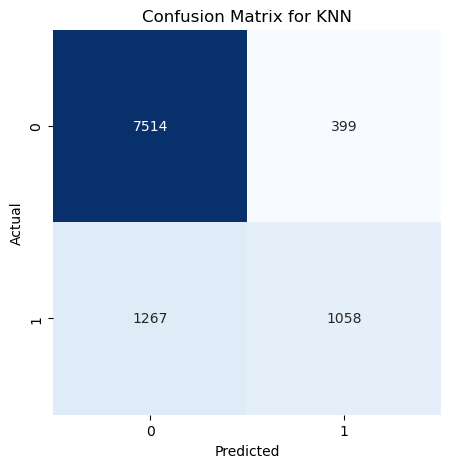

In [110]:
display_confusion_matrix(y_val, y_val_preds_knn, "KNN")

In [111]:
### KNN with SMOTE ###

knn_grid_smote = GridSearchCV(knn_clf, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_smote.fit(X_train_resampled, y_train_resampled)

y_val_preds_knn_smote = knn_grid_smote.predict(X_val_scaled)
y_val_probs_knn_smote = knn_grid_smote.predict_proba(X_val_scaled)[:, 1]


KNN Performance on SMOTE Data:
AUC score (SMOTE): 0.80
F1 (SMOTE): 0.57
Precision (SMOTE): 0.49
Recall (SMOTE): 0.69
Accuracy (SMOTE): 0.77


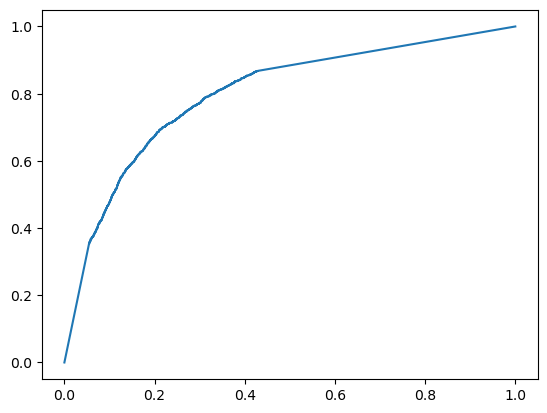

In [112]:
# ROC and AUC for KNN with SMOTE
auc_knn_smote = plot_roc_curve("KNN (SMOTE)", y_val, y_val_probs_knn_smote)

# Print results for KNN with SMOTE
print("\nKNN Performance on SMOTE Data:")
print(f"AUC score (SMOTE): {auc_knn_smote:.2f}")
print(f"F1 (SMOTE): {f1_score(y_val, y_val_preds_knn_smote):.2f}")
print(f"Precision (SMOTE): {precision_score(y_val, y_val_preds_knn_smote):.2f}")
print(f"Recall (SMOTE): {recall_score(y_val, y_val_preds_knn_smote):.2f}")
print(f"Accuracy (SMOTE): {accuracy_score(y_val, y_val_preds_knn_smote):.2f}")

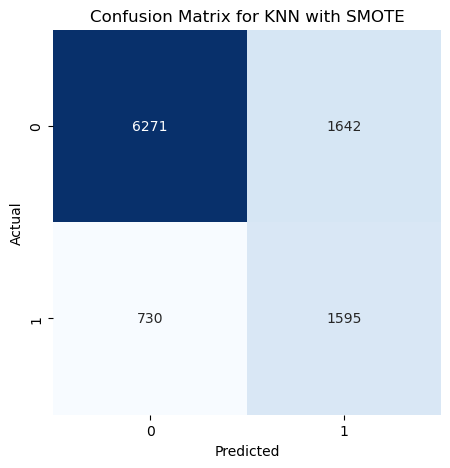

In [113]:
display_confusion_matrix(y_val, y_val_preds_knn_smote, "KNN with SMOTE")

##Support Vector Machine (SVM)

In [115]:
svm_param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}


In [116]:
svm_clf = SVC(probability=True, random_state=42)  # Enable probability estimation
svm_grid = GridSearchCV(svm_clf, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM accuracy:", svm_grid.best_score_)

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM accuracy: 0.8477130627747309


In [117]:
# Predict on validation set
y_val_preds_svm = svm_grid.predict(X_val_scaled)
y_val_probs_svm = svm_grid.predict_proba(X_val_scaled)[:, 1]


SVM Performance:
F1 score:  0.5692883895131086
Precision score:  0.7530077848549186
Recall score:  0.45763440860215054
Accuracy:  0.8427427231881227
AUC score (SVM): 0.83


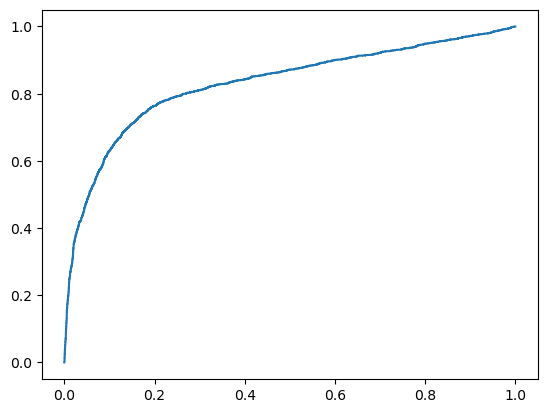

In [118]:
# ROC and AUC for SVM
auc_svm = plot_roc_curve("SVM", y_val, y_val_probs_svm)

# Evaluate the model on the test set
f1 = f1_score(y_val, y_val_preds_svm)
precision = precision_score(y_val, y_val_preds_svm)
recall = recall_score(y_val, y_val_preds_svm)
accuracy = accuracy_score(y_val, y_val_preds_svm)

print("\nSVM Performance:")
print("F1 score: ", f1)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("Accuracy: ", accuracy)
print(f"AUC score (SVM): {auc_svm:.2f}")


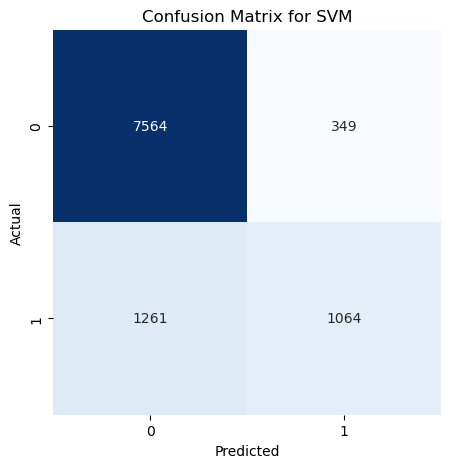

In [119]:
display_confusion_matrix(y_val, y_val_preds_svm, "SVM")

##Neural Network (MLP)

In [99]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [101]:
mlp_clf = MLPClassifier(max_iter=500, random_state=42)
mlp_grid = GridSearchCV(mlp_clf, mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train_scaled, y_train)
print("Best MLP parameters:", mlp_grid.best_params_)
print("Best MLP accuracy:", mlp_grid.best_score_)

Best MLP parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Best MLP accuracy: 0.8506923624129632


In [ ]:
# Predict on validation set
y_val_preds_mlp = mlp_grid.predict(X_val_scaled)
y_val_probs_mlp = mlp_grid.predict_proba(X_val_scaled)[:, 1]


MLP Performance:
F1 score:  0.6115375092844764
Precision score:  0.720536756126021
Recall score:  0.5311827956989247
Accuracy:  0.8467474116038288
AUC score (MLP): 0.87


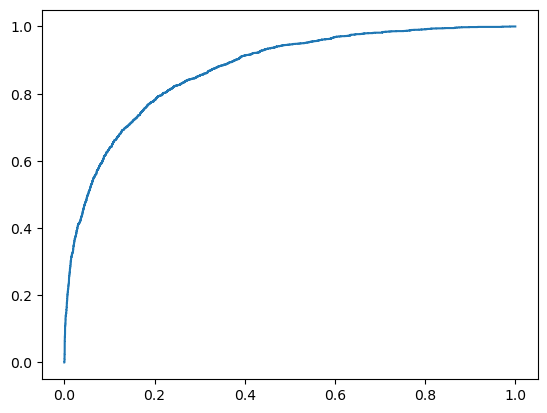

In [125]:
# ROC and AUC for MLP
auc_mlp = plot_roc_curve("MLP", y_val, y_val_probs_mlp)

# Evaluate the model on the test set
f1 = f1_score(y_val, y_val_preds_mlp)
precision = precision_score(y_val, y_val_preds_mlp)
recall = recall_score(y_val, y_val_preds_mlp)
accuracy = accuracy_score(y_val, y_val_preds_mlp)

print("\nMLP Performance:")
print("F1 score: ", f1)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("Accuracy: ", accuracy)
print(f"AUC score (MLP): {auc_mlp:.2f}")

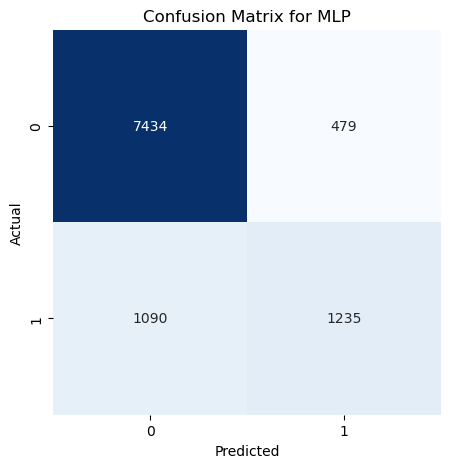

In [126]:
display_confusion_matrix(y_val, y_val_preds_mlp, "MLP")

In [103]:
# Predict on the unknown test set
y_unknown_preds = mlp_grid.predict(X_unknown_scaled)

# Create a DataFrame with the predictions
unknown_test_data_with_predictions = pd.DataFrame({
    'row ID': [f"Row{i}" for i in range(len(unknow_test_data))],
    'Predict-RainTomorrow': y_unknown_preds  # Predictions
})

# Save the result in the required format as a new CSV file
output_file_path = r"C:\Users\MSI\Documents\Data Analysis\Assignment 3\Assignment3-UnknownData_with_Predictions.csv"
unknown_test_data_with_predictions.to_csv(output_file_path, index=False)

# Print the first few rows to confirm format
print(unknown_test_data_with_predictions.head())

  row ID  Predict-RainTomorrow
0   Row0                  0.00
1   Row1                  0.00
2   Row2                  0.00
3   Row3                  0.00
4   Row4                  0.00
